## The University of Chicago - Urban Labs - Data Science Assessment | Rishi Sankineni


### Crime in Chicago has been tracked by the Chicago Police Department’s Bureau of Records since the beginning of the 20th century. The city’s overall crime rate, especially the violent crime rate, is substantially higher than the US average. Chicago was responsible for nearly half of 2016’s increase in homicides in the US, though national crime rates stayed near historic lows.As of 2017, Chicago’s homicide rate is significantly higher when compared to the larger American cities of New York and Los Angeles, but lower when compared to smaller American cities. The reason for the violence which is localized to some areas of the city, including change in police tactics or increase in gang rivalry, remain unclear.



In [1]:

import pandas as pd ## Import all the packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

color = sns.color_palette() ## seaborn palette for beautiful plots
df = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/case.csv") ## load case.csv
df1 = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/Prior_arrests.csv") ## load prior arrests.csv
demodf = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/Demo.csv") ## load demo.csv
df["re_arrest"] = "" ## add re_arrest column to case.csv

print(" The data set has", len(df), "rows") 
print(" The data set has", len(df1), "rows")
print(" The data set has", len(demodf), "rows")

 The data set has 25000 rows
 The data set has 43602 rows
 The data set has 14353 rows


In [2]:
df.head() ## top 5 

,caseid,person_id,arrest_date,dispos_date,treat,re_arrest
0,4,3715,2012-03-26,2012-04-10,1,
1,5,12086,2013-03-28,2013-06-17,0,
2,10,6849,2012-01-15,2012-07-10,1,
3,12,7403,2012-09-28,2012-11-05,0,
4,19,7821,2013-09-28,2013-10-18,1,


In [3]:
df1.head() ## top 5

,person_id,arrest_date
0,1,2008-06-14
1,1,2010-04-09
2,5,2009-06-07
3,5,2010-05-20
4,6,2008-03-16


In [4]:
demodf.head() ## top 5

,person_id,race,gender,bdate
0,1,HISPANIC,F,1985-07-03
1,5,BLACK,M,1986-09-27
2,6,BLACK,M,1991-06-07
3,7,HISPANIC,F,1994-08-24
4,8,BLACK,M,1978-04-04


### Part 1: Data Management

### a) The main outcome of interest is whether the defendant was arrested again prior to his/her disposition (trial or court appearance) date. Create a variable called ‘re_arrest’ that equals one if the defendant was arrested prior to trial and zero otherwise. E.g., imagine person 1 was arrested three times.

In [5]:
result = df.sort_values(['person_id'], ascending = [1]) ## sort the person_id values

arrest_date = result['arrest_date'].astype('datetime64[ns]') ## convert object to datatime format 
dispos_date = result['dispos_date'].astype('datetime64[ns]') 

result['person_id_s'] = result['person_id'].shift(-1) ## current row and next arrow comparision
result['arrest_date_s'] = result['arrest_date'].shift(-1) ## current row and next arrow comparision
result['dispos_date_s'] = result['dispos_date'].shift(-1) ## current row and next arrow comparision
##compare the dates to see if the defendant was arrested prior to trial or not. Print True when yes and viceversa.
result['re_arrest'] = (result['person_id'] == result['person_id_s']) & (result['arrest_date_s'] < result['dispos_date'])
result.re_arrest = result.re_arrest.astype(int) ## convert the boolean values(True/False) in re_arrest column to 0/1(int)
result.drop('person_id_s', axis=1, inplace = True) ## drop the unnecessary columns
result.drop('arrest_date_s', axis=1, inplace = True) ## drop 
result.drop('dispos_date_s', axis=1, inplace = True) ## drop
result.head()


# result.drop(result.columns[['person_id_s','arrest_date_s']], axis=1, inplace=True)
# result['rearrest'].value_counts()

,caseid,person_id,arrest_date,dispos_date,treat,re_arrest
14404,57514,1,2012-01-04,2012-03-27,0,0
22174,88413,1,2013-04-04,2013-06-22,0,1
9967,39970,1,2012-07-11,2012-10-20,1,0
10028,40216,5,2012-03-31,2013-03-25,0,0
23129,92255,6,2012-12-09,2013-11-09,0,0


### Re-arrests distribution

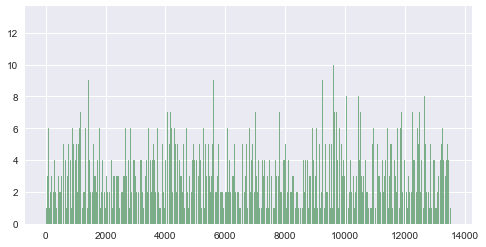

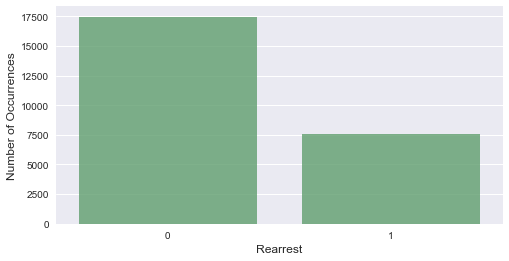

0    17457
1     7543
Name: re_arrest, dtype: int64


In [55]:
result['re_arrest'].value_counts() ## display number of re_arrests.

totalrearrests = result['re_arrest'].value_counts() ## did not do groupby because it does not consider unique values.

plt.figure(figsize=(8,4))
sns.barplot(totalrearrests.index, totalrearrests.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rearrest', fontsize=12)
plt.show()
print(totalrearrests)

### b) Create a variable called prior_arrests that equals the number of arrests prior to the current arrest. Assume that all of the individual’s arrests prior to the study period are contained in prior.csv. For example, if person z has five arrests in prior.csv and two in case.csv, her first arrest in case.csv should have prior_arrests = 5 and the second should have prior_arrests = 6. If someone is not included in prior_arrests.csv, assume they had zero arrests at the start of the study period.


In [7]:
case_df = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/case.csv") ## load case df
prior_df = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/Prior_arrests.csv") ## load prior df

totalprocc = prior_df['person_id'].value_counts() ## load person_id's in prior_arrests.csv
totalcaseocc = case_df['person_id'].value_counts() ## load person_ids's in case.csv.
totaltop = case_df['person_id']
# totalprocc.head()

## count the number of arrests by person_id in prior_arr.csv
crime_count_ppid = pd.DataFrame(prior_df.groupby(['person_id']).size().sort_values(ascending=False).rename('counts').reset_index())
# crime_count_ppid.head(10)

## count the number of arrests by person_id in case.csv
crime_count_ccid = pd.DataFrame(case_df.groupby(['person_id']).size().sort_values(ascending=False).rename('counts').reset_index())
# crime_count_ccid.head(10)
# print(case_df)
# print(cv['counts'][12086])
# print(case_df['person_id'][index])
# print(len(ca))
cv =crime_count_ppid.to_dict() ## convert ppid df to dictionary
#print(cv)
column=[0 for _ in range(0,len(case_df))] ## set a range for column list


## loop through the values in case.csv and prior_arrests.csv
## this is an efficient way to perform lookup and hash mapping
dic={}
for index in range(1,len(case_df)):
    if case_df['person_id'][index] not in dic:
        
        if  case_df['person_id'][index] not in cv['counts']: ## condition for person_id when not in case counts.
            dic[case_df['person_id'][index]] = 0
            column[index]=0
        
        else:
            dic[case_df['person_id'][index]]=cv['counts'][case_df['person_id'][index]] ## condition for person_id when not in case counts.
            column[index]=dic[case_df['person_id'][index]]
            
    else:
        dic[case_df['person_id'][index]] += 1 ## increment if person_id in prior_arrest.csv
        column[index]=dic[case_df['person_id'][index]]
# print(column)
# labels = ['prior_arrests']
# hey = pd.DataFrame.from_records(column, columns = 'prior_arrests')

priorarr = pd.DataFrame({'prior_arrests': column }) ## convert list to a single column dataframe
sortpriorarr = priorarr.sort_values('prior_arrests', ascending=False) ## sort by prior_arrests
sortpriorarr.head()

# df
casearrest = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/case.csv")
casearrest['prior_arrests'] = "" ## create a new variable prior_arrests and set it to null
# cdf1.head()

casearrest['prior_arrests'] = priorarr['prior_arrests'] ## store priorarr column in casearrest
casearrest.head()
# srt.head()


totpriorarrests = casearrest.sort_values('arrest_date',ascending=True) ## sort by arrest_date.
totpriorarrests


# from numpy import array
# a = array(column)
# print(a)
# print(a.dtype)
# column.dtype()       
# from collections import defaultdict
# dic = defaultdict(int)
# for c in ca:
#     dic[c] += 1
# from collections import Counter    
# case_df = case_df.merge(prior_df[['person_id',]])
# totalprocc.head()
# def diff(n,m):
# totalcaseocc
# new_df = pd.DataFrame(case_df['person_id']                     
# new_df["count"] = ""
# case_df['person_id'].value_counts()
# def numberofocc(sequence,item):
#     total = 0
#     for i in sequence:
#         if i in item:
#             total += 1
#         return total
# print(numberofocc(totalcaseocc, totalprocc))
# for p in totalcaseocc:
#     print( p,"has", len(totalcaseocc[p]),"entries")

# def difference(a,b):
#     if a-b:
#         return 1
#     else:
#  return 0
# doct = []
# if case_df['person_id'] == prior_df['person_id']:
#     doct.append(person_id)
#     else:
#         return 0

,caseid,person_id,arrest_date,dispos_date,treat,prior_arrests
7752,30968,2730,2012-01-02,2012-08-01,1,5
11485,46124,2316,2012-01-02,2012-05-26,1,6
15254,60958,8784,2012-01-02,2012-02-20,0,2
227,880,8475,2012-01-02,2012-01-26,1,2
10390,41722,18400,2012-01-02,2012-04-14,0,2
24862,99467,9955,2012-01-02,2012-03-28,0,4
22307,88929,6416,2012-01-02,2013-09-05,1,3
181,698,8245,2012-01-02,2012-01-23,1,2
16764,67334,13202,2012-01-02,2012-06-20,0,1
11846,47508,6424,2012-01-02,2014-06-16,0,5


## Priorarrests distribution

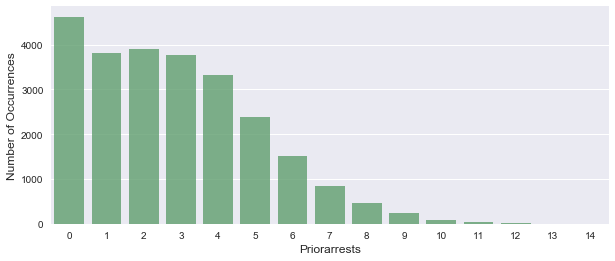

In [8]:
totalpriorarr = totpriorarrests['prior_arrests'].value_counts()


plt.figure(figsize=(10,4))
sns.barplot(totalpriorarr.index, totalpriorarr.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Priorarrests', fontsize=12)
plt.show()



## c. Create an ‘age’ variable that equals the defendant’s age at the time of each arrest.

In [12]:
s1 = pd.merge(df, demodf, how ='left', on=['person_id'])  ## merge casedf and demodf 
s1["age"] = "" ## create an empty variable age and set it to null
s1.head()

,caseid,person_id,arrest_date,dispos_date,treat,re_arrest,race,gender,bdate,age
0,4,3715,2012-03-26,2012-04-10,1,,BLACK,M,1980-09-22,
1,5,12086,2013-03-28,2013-06-17,0,,HISPANIC,M,1973-09-24,
2,10,6849,2012-01-15,2012-07-10,1,,BLACK,M,1984-07-13,
3,12,7403,2012-09-28,2012-11-05,0,,HISPANIC,M,1975-03-27,
4,19,7821,2013-09-28,2013-10-18,1,,BLACK,M,1982-06-11,


In [16]:

arrest_date = s1['arrest_date'].astype('datetime64[ns]') ## convert to datetime
birth_date = s1['bdate'].astype('datetime64[ns]') ## convert to datetime

print(arrest_date.dtype) ## print dtype

s1['age in days'] = arrest_date - birth_date ## difference in arrest date and birth date
s1['age'] = s1['age in days'].astype(pd.Timedelta).apply(lambda l: int((l.days)/365)) ## divide the number of days/365 to get age in years 
#s1.drop('re_arrest', axis=1, inplace = True) ## drop
#s1.drop('dispos_date', axis=1, inplace = True) ## drop
# s1.drop('diff', axis=1, inplace = True) ## drop
s1.head()


#------- ***** ------  attempt
# s1['years'] = s1['diff'].apply(lambda x: float(x.item().days)/365)
# def age(a,b):
#     return a-b
# print (age(arrest_date[1], birth_date[1]))


datetime64[ns]


,caseid,person_id,arrest_date,treat,race,gender,bdate,age,age in days
0,4,3715,2012-03-26,1,BLACK,M,1980-09-22,31,11508 days
1,5,12086,2013-03-28,0,HISPANIC,M,1973-09-24,39,14430 days
2,10,6849,2012-01-15,1,BLACK,M,1984-07-13,27,10047 days
3,12,7403,2012-09-28,0,HISPANIC,M,1975-03-27,37,13700 days
4,19,7821,2013-09-28,1,BLACK,M,1982-06-11,31,11432 days


## Arrests by age

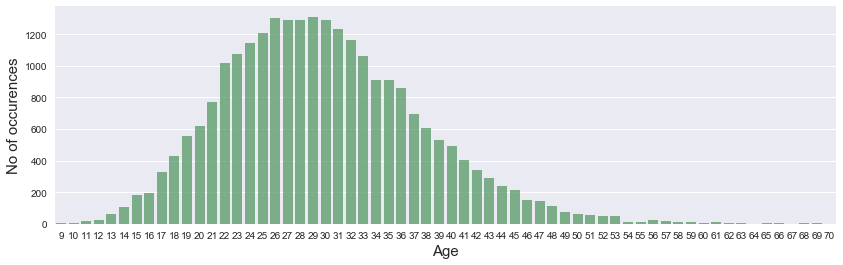

In [17]:
convictage = s1['age'].value_counts()
convictage.head()

plt.figure(figsize=(14,4))
sns.barplot(convictage.index, convictage.values, alpha=0.8, color=color[1])
plt.ylabel('No of occurences', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()



## Part 2: Statistical Analysis

## Help the SA’s Office determine if the program should be continued/expanded by estimating the program’s effect on re-arrests prior to disposition. To draw conclusions about this program’s effect, answer the following questions.

### a) Describe the study population based on the data available to you.

Ans:

Who is getting arrested more?

African Americans(Blacks) are more likely[60%-8647/14353] to get arrested when compared to people of other race's. According to our data African American(Blacks) arrestee distribution is something like this: Male arrestees ( 6958/14353] = 48.4% , Female arrestees ( 1689/14353] = 11%. Wow, that's a huge difference. So, we can conclude that Black males are more likely to get arrested than Black females. Though, It would have been interesting to see the arrest-related death because being arrested is nearly as deadly for African-Americans as Whites. 
Interesting read: https://fivethirtyeight.com/datalab/being-arrested-is-nearly-twice-as-deadly-for-african-americans-as-whites/

### b) Are the treatment and control groups balanced, or are differences (race, gender, age, and prior arrests) in the composition of the two groups?

Ans:

No, the treatment and control group are not balanced because there are some differences in the composition of the two groups. Mainly, the gender and age distribution in the treatment and control groups is not balanced(as shown in the plots below). I think the distribution is more skewed/imbalanced, which is not helpful when building a predictive model(predicting rearrests in the future,etc.). We can undersample/oversample the data by considering the majority/minority distribution in the data. This is my conclusion(might be right/wrong).

### c) Did participating in the program reduce the likelihood of re-arrest before disposition? Explain your answer and your methodology.

Ans:

Yes, participating in the Cook County State’s Attorney’s Office program definitely reduced the likelihood of re-arrest before disposition. According to the distribution plot of number of re-arrests before disposition(plotted above[cell-6]), we can conclude that the likelihood of getting re-arrested is very minimal[30%-7543/25000]. With the likelihood of not getting re-arrested being very high[~70%- 17547/25000] this program seems really viable.

In [18]:
demodf = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/Demo.csv")
demdf = pd.DataFrame(demodf.groupby(['race','gender']).size()) ## groupby on race and gender to know the composition
demdf

# demdf = demdf.rename(columns={'race': 'RACE', 'gender': 'GENDER'})
# demdf.head()
# demodf['race'].value_counts()
# demodf['gender'].value_counts()

0
race     gender      
ASIAN    F        137
         M        570
BLACK    F       1689
         M       6958
HISPANIC F        752
         M       2856
WHITE    F        264
         M       1127

## Arrests by race

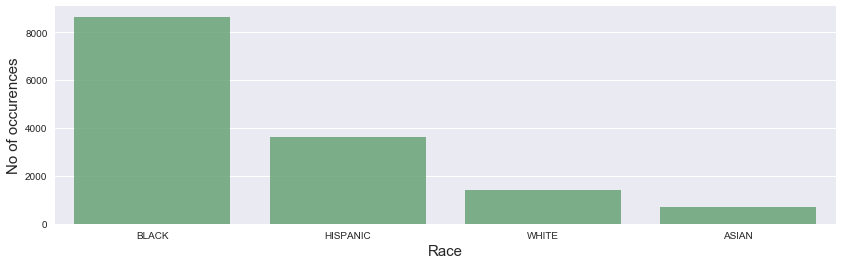

In [19]:
racedf = demodf['race'].value_counts()

plt.figure(figsize=(14,4))
sns.barplot(racedf.index, racedf.values, alpha=0.8, color=color[1])
plt.ylabel('No of occurences', fontsize=15)
plt.xlabel('Race', fontsize=15)
plt.show()



## Arrests by gender

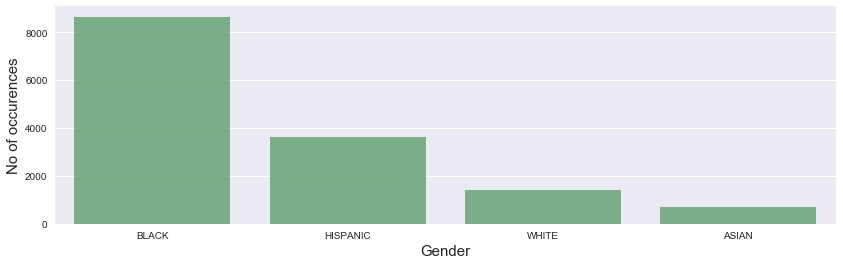

In [20]:
genderdf = demodf['gender'].value_counts()

plt.figure(figsize=(14,4))
sns.barplot(racedf.index, racedf.values, alpha=0.8, color=color[1])
plt.ylabel('No of occurences', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.show()

## Stacked bar chart of gender and race ( Number of arrests)

In [21]:
import plotly
# plotly.tools.set_credentials_file(username='rishisankineni18', api_key='IWbHx34pQ80aAFYqXYAL')
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['Asian', 'Black', 'Hispanic', 'White'],
    y=[137, 1689 , 752 , 264],
    name='Female'
)
trace2 = go.Bar(
    x=['Asian', 'Black', 'Hispanic', 'White'],
    y=[570, 6958, 2856, 1127],
    name='Male'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


## Number of arrests on a particular day

In [22]:
df2 = pd.concat([df,df1])
df2 = df2.reset_index(drop = True)
df2['arrest_date'] = pd.to_datetime(df['arrest_date'])
crime_count_ppid = pd.DataFrame(df1.groupby(['person_id', 'arrest_date']).size().sort_values(ascending=False).rename('counts').reset_index())
crime_count_ppid.head(10)

,person_id,arrest_date,counts
0,2174,2010-04-02,2
1,1651,2008-03-16,2
2,18209,2009-05-30,2
3,9684,2008-08-13,2
4,11361,2008-08-23,2
5,10578,2010-08-18,2
6,9667,2011-12-30,2
7,4086,2008-03-22,2
8,6340,2008-04-03,2
9,13812,2008-12-20,2


In [ ]:
crime_count_ccid = pd.DataFrame(df2.groupby(['person_id', 'arrest_date']).size().sort_values(ascending=False).rename('counts').reset_index())
crime_count_ccid.head(10)

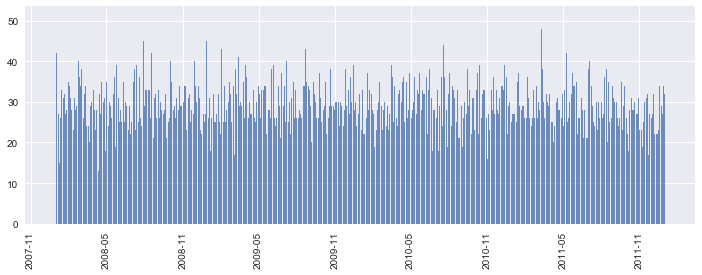

In [24]:

crime_count_ppid["arrest_date"] = pd.to_datetime(crime_count_ppid["arrest_date"])
crime_count_ppid["dateofarrest"] = crime_count_ppid["arrest_date"].dt.date
cnt_srs = crime_count_ppid['dateofarrest'].value_counts()


plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

#### Tried to plot the following data but i was struck with some year/date parsing issues. Will come back to this when i found some time

In [44]:
# FACTOR_PLOT

# dt = s1[(s1['age']>=20) & (s1['age'].notnull()) ]
# sns.factorplot(data=s1, x="arrest_date", col="gender", y='age', size=4)  

#### Factor plot of arrests in a particular year with all the Gender and Race.

In [40]:

# from datetime import datetime

# s1['arrest_year'] =s1.arrest_date.map(lambda x: datetime.strptime(x, '%Y/%m/%d').year)
# s1['arrest_month'] =s1.arrest_date.map(lambda x: datetime.strptime(x, '%Y/%m/%d').month)

# sns.set()
# sns.factorplot(hue='arrest_year', x='Race', col='Sex', data=s1, kind='count',size=3 )

#### Facetgrid of arrest years by gender and age

In [ ]:
# g = sns.FacetGrid(dt, row='ArrestYear', col="Sex", size=4)  
# g.map(sns.distplot, "Age")  

In [54]:
# df1 = pd.read_csv("/Users/Rishi/desktop/Crimelab-UChicago/Prior_arrests.csv")

# resultprior = df1.sort_values(['person_id'], ascending = [1])

# arrest_date = resultprior['arrest_date'].astype('datetime64[ns]')
# resultpriorcount = resultprior['arrest_date'].value_counts()

# priorarrests = resultprior['person_id'].value_counts()

# plt.figure(figsize=(8,4))
# sns.barplot(priorarrests.index, priorarrests.values, alpha=0.8, color=color[1])
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Rearrest', fontsize=12)
# plt.show()

